Mean Squared Error: 0.5164
R² Score: 0.6059


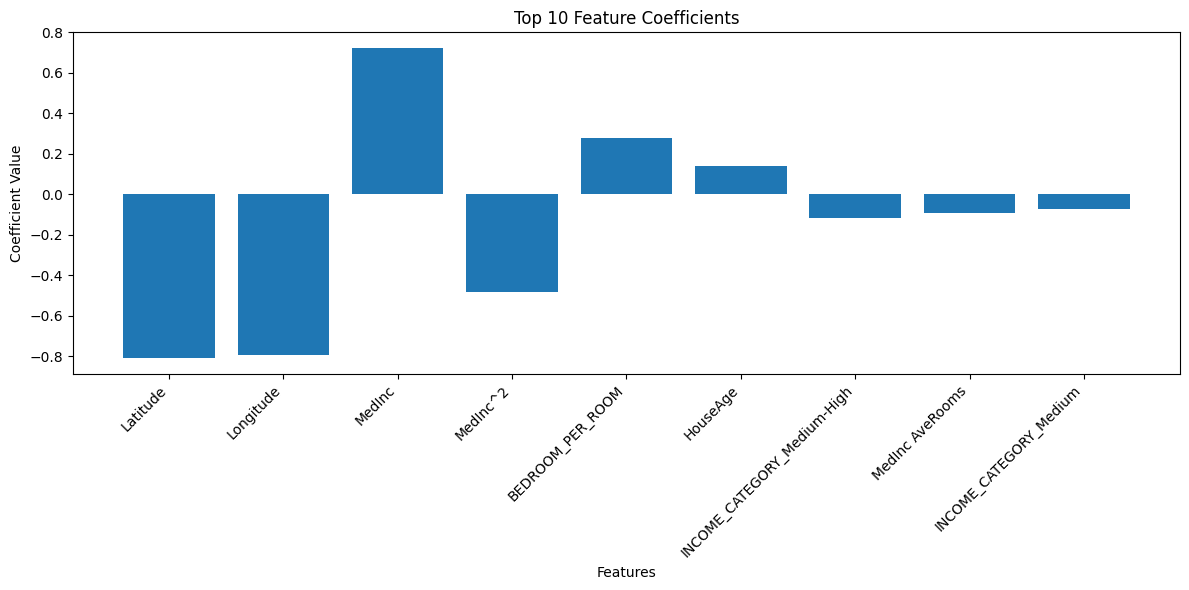

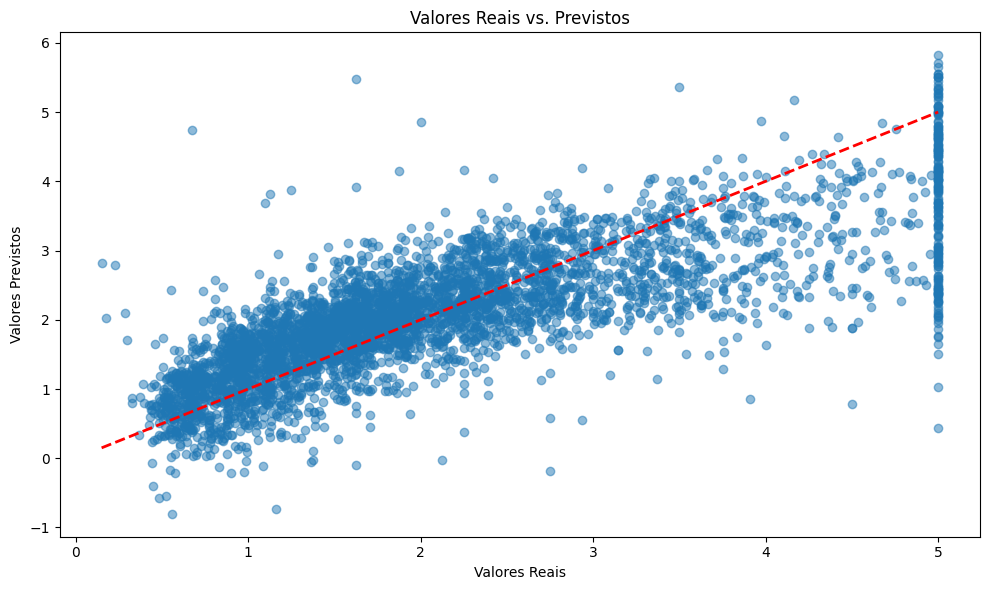


Equação da Regressão (5 features mais importantes):
Price = 0.7237 * Latitude + 0.1407 * Longitude + 0.0733 * MedInc + 0.0070 * MedInc + -0.0011 * MedInc^2 + 2.0719


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target
feature_names = housing.feature_names

# Criar DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['Price'] = y


#-------------------------------------Feature Engeneering-------------------------------------#

df['BEDROOM_PER_ROOM'] = df['AveBedrms'] / df['AveRooms']
df['LOG_POPULATION'] = np.log1p(df['Population'])
df['INCOME_CATEGORY'] = pd.qcut(df['MedInc'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
df_encoded = pd.get_dummies(df, columns=['INCOME_CATEGORY'], drop_first=True)

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['MedInc', 'AveRooms']])
poly_feature_names = poly.get_feature_names_out(['MedInc', 'AveRooms'])
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

X_engineered = pd.concat([df_encoded.drop('Price', axis=1), df_poly], axis=1)

#-------------------------------------Modelo de Regressão Linear-------------------------------------#

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X_engineered, df['Price'], test_size=0.2, random_state=42)

# Padronizar as features (normalização)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prever e avaliar
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualizar os coeficientes (pesos)
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(coef_df['Feature'][:10], coef_df['Coefficient'][:10])
plt.title('Top 10 Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotar valores reais vs. previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Previstos')
plt.tight_layout()
plt.show()

#-------------------------------------Equação da Regressão-------------------------------------#
# Equação da regressão (para as 5 features mais importantes)
top_features = coef_df['Feature'][:5].tolist()
equation = "Price = "
for feature, coef in zip(top_features, model.coef_[:5]):
    equation += f"{coef:.4f} * {feature} + "
equation += f"{model.intercept_:.4f}"
print("\nEquação da Regressão (5 features mais importantes):")
print(equation)

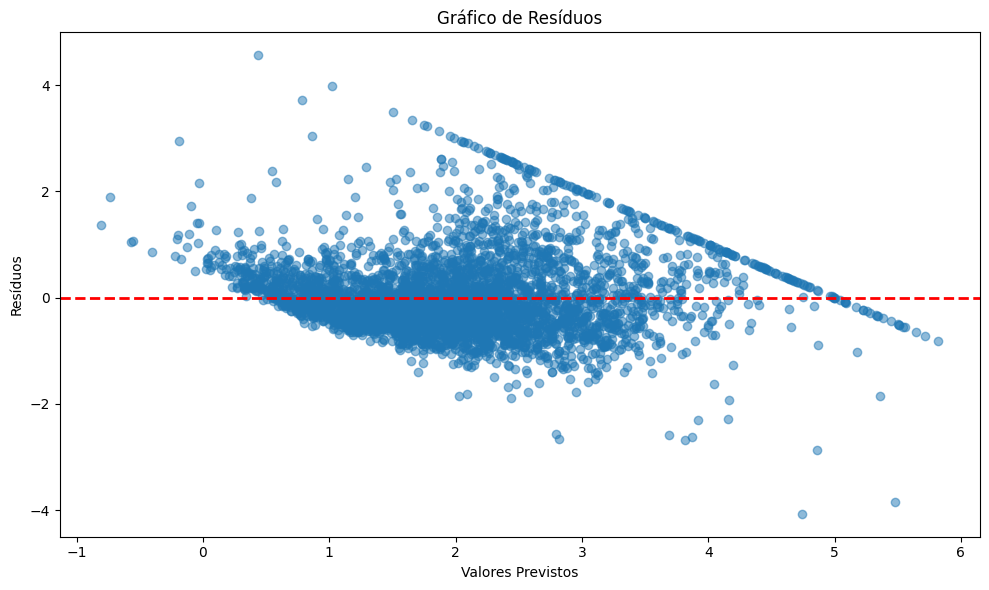

In [6]:
# Calcular os resíduos
residuos = y_test - y_pred

# Plotar resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)  # Linha horizontal em y=0
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.tight_layout()
plt.show()